In [9]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc 
import sklearn as sk
import seaborn as sns


In [10]:
# convert the data from files format into dataframe

# ! pip install pyreadstat

1. Data Acquisition 

In [11]:
# Read data from CSV file 

dataset = pd.read_csv("healthcare-dataset-stroke-data.csv")
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [12]:
dataset.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [13]:
import missingno as msno

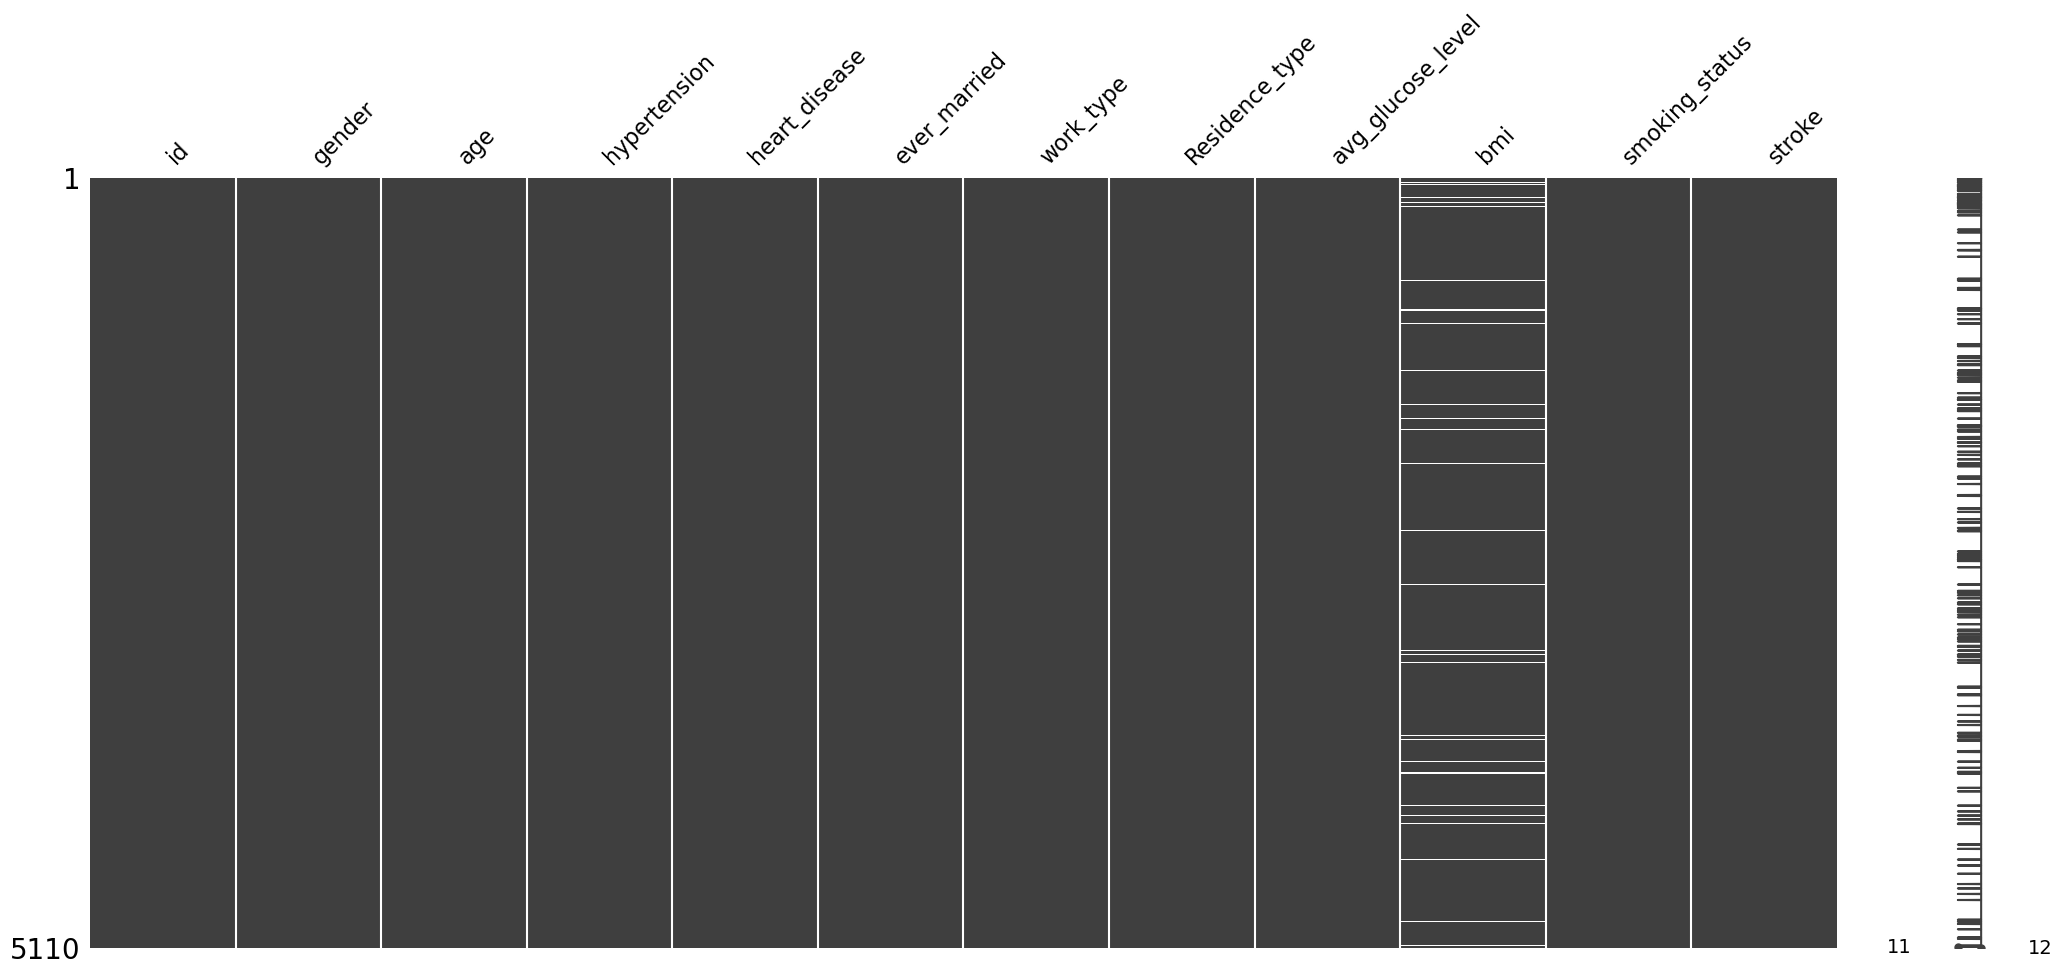

In [14]:
msno.matrix(dataset)
plt.show()

In [15]:
# Fill null values by mean of the bmi column
dataset['bmi'] = dataset['bmi'].fillna(dataset['bmi'].mean()) 

In [16]:
dataset.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [17]:
dataset.duplicated().sum()

0

# Split dataset into train and test 

In [18]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dataset, test_size=0.3)

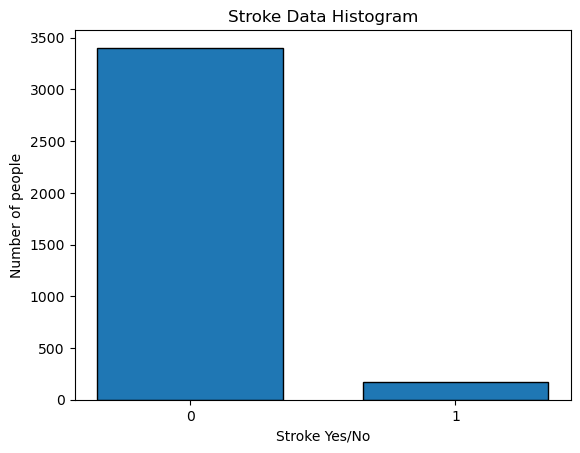

In [19]:
plt.hist(train['stroke'], bins=[-0.5, 0.5, 1.5], edgecolor='black', rwidth=0.7)

# Customizing x-axis labels
plt.xticks([0, 1], ['0', '1'])

# Adding title and labels
plt.title('Stroke Data Histogram')
plt.xlabel('Stroke Yes/No')
plt.ylabel('Number of people')

# Showing the plot
plt.show()

# Data Prep

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

Separate the target variable (we don't want to transform it)

In [21]:
train_y = train[['stroke']]
test_y = test[['stroke']]

train_inputs = train.drop(['stroke'], axis=1)
test_inputs = test.drop(['stroke'], axis=1)

Identify numeric or categorical columns

In [22]:
train_inputs.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
dtype: object

In [23]:
train_inputs.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3629,7859,Male,34.0,0,0,Yes,Private,Urban,99.23,28.893237,smokes
3556,34161,Male,33.0,1,0,Yes,Private,Rural,85.12,32.500000,never smoked
3247,64498,Female,53.0,0,0,Yes,Private,Rural,90.65,22.100000,formerly smoked
4836,35446,Male,73.0,0,0,Yes,Govt_job,Rural,208.69,30.000000,Unknown
4922,63650,Female,47.0,0,0,Yes,Govt_job,Urban,135.79,32.100000,formerly smoked


In [24]:
# Identify the numerical columns
numeric_columns = train_inputs.select_dtypes(include=[np.number]).columns.to_list()

# Identify the categorical columns
categorical_columns = train_inputs.select_dtypes('object').columns.to_list()

In [25]:
binary_columns = ['hypertension', 'heart_disease']

In [26]:
# Be careful: numerical columns already includes the binary columns,
# So, we need to remove the binary columns from numerical columns.

for col in binary_columns:
    numeric_columns.remove(col)

In [27]:
numeric_columns

['id', 'age', 'avg_glucose_level', 'bmi']

In [28]:
categorical_columns

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [29]:
binary_columns

['hypertension', 'heart_disease']

## Pipeline 

In [30]:
numeric_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [31]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [32]:
binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))])

In [33]:
preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns),
        ('binary', binary_transformer, binary_columns)],
        remainder='drop')


Fit Transform train data 

In [34]:
#Fit and transform the train data
train_x = preprocessor.fit_transform(train_inputs)

train_x

array([[-1.35298214, -0.41270946, -0.14996659, ...,  1.        ,
         0.        ,  0.        ],
       [-0.09997113, -0.45705369, -0.4626795 , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.34526479,  0.42983077, -0.34012086, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.59561125,  0.74024033, -0.01145096, ...,  0.        ,
         0.        ,  0.        ],
       [-1.08029432, -1.69869193, -0.38909999, ...,  0.        ,
         0.        ,  0.        ],
       [-0.38475935, -1.34393814, -0.66967727, ...,  0.        ,
         0.        ,  0.        ]])

In [43]:
train_x_df = pd.DataFrame(train_x)
train_x_df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-1.352982,-0.412709,-0.149967,0.007207,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.099971,-0.457054,-0.462680,0.477983,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.345265,0.429831,-0.340121,-0.879484,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.038755,1.316715,2.275941,0.151668,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.304867,0.163765,0.660294,0.425772,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3572,1.381375,0.607208,0.493854,0.699876,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3573,1.075435,0.518519,-0.901275,0.112511,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3574,-0.595611,0.740240,-0.011451,-0.057173,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3575,-1.080294,-1.698692,-0.389100,-1.414640,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [35]:
train_x.shape

(3577, 22)

Transform test data

In [36]:
test_x = preprocessor.transform(test_inputs)

test_x

array([[ 0.521961  ,  0.16376543,  0.0918263 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20263422, -0.98918436, -0.35098049, ...,  1.        ,
         0.        ,  0.        ],
       [-1.61428415,  0.74024033,  2.3796614 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.40305287,  1.27237101,  2.28857352, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.39123853, -0.50139791,  1.21103266, ...,  1.        ,
         0.        ,  0.        ],
       [-0.09339689,  1.22802678, -0.28183348, ...,  0.        ,
         0.        ,  0.        ]])

In [37]:
test_x.shape

(1533, 22)

## Data Insights

In [41]:
sns.catplot(data=train_x, x= 'gender', kind='bar')

AttributeError: 'numpy.ndarray' object has no attribute 'get'